# Midterm

5 pm, Oct. 18th- 12 pm Oct. 20th, 2022

### Instructions

**Before you turn this exam in, make sure everything runs as expected: in the menubar, select `Kernel` $\rightarrow$ `Restart & Run All`. If you have failing tests, then you may need to use `Cell` $\rightarrow$ `Run All Below` to execute cells past the failing tests. After running all (functional) cells in order you should leave the output in the notebook and submit.**

Any `assert` statements are provided to check your answers. Unlike auto-graded sections in homework assignments, **you may receive partial (or full) credit even if these code blocks fail**, and you may not receive full credit even if they pass (e.g. if you hack them to pass). Problems without `assert` statements may have multiple correct solutions, and will be manually graded by instructors.

Make sure you fill in any place that says `# Start your code here`. Please also write your name and official GT ID below.

### The timer is strict, be sure to submit in time!

You may submit the exam up to 20 times. If you plan to work up until the very end of the timer please be sure to submit a nearly-complete version 5 minutes ahead of time to ensure that you don't lose your work if you barely miss the timer. The exam should auto-submit at the end, but it is strongly suggested that you manually submit a few minutes ahead of time to be safe.

In [ ]:
NAME = ""
GTID = "" #e.g. gburdell0

## Logistical Notes and Instructions

Failure to follow these instructions may negatively impact your grade.

* Your exam must be submitted prior to the timer ending on your Canvas quiz. **Accessing the Vocareum assignment after the timer expires or downloading the exam file without permission will be considered an honor code violation.** Vocareum logs record all access times and downloads. If you need to download the exam due to an emergency (e.g. unable to submit at the last minute) that is okay, but please notify instructors immediately.

* You have **90 minutes to complete the exam**, and you have 15 extra minutes to deal with any logistical issues that may arise or take a break. This means minor technical issues that are resolved in $<$5 minutes will not result in an extension of the timer, and that you should have plenty of time to run everything and submit the exam. If you encounter unexpected technical issues please notify instructors immediately to establish a contingency plan.

* If you have issues or questions please contact instructors via a **private Canvas message**. Do not use any other means of communication during the exam. Instructors will monitor Canvas closely during the "office hours" (see Canvas announcement) and as often as possible in between. It is strongly recommended that you begin the exam during one of these windows. If you are unable to use Canvas or need to get in touch immediately you may call or text Dr. Medford's cell phone at 650-213-2306.

* Instructors will **not answer questions related to content** in order to ensure a fair experience for everyone. In the case of ambiguities, typos, or possible errors you will be asked to use your best judgement, so **please restrict questions to technical issues that hinder your ability to complete the exam.**

* You may use any online resources or your own notes on the exam. However, you may not communicate with any of your classmates regarding the exam at any point during the exam time window. **Inappropriate communication will be considered an honor code violation.**

* Code blocks containing `assert` statements should not cause errors if the solution is correct, but there may be slight differences due to implementations. As long as you attempt the problem, you will receive partial credit even if the auto-grader does not pass.

* There are 3 main problems, each with sub-problems, that are worth a total of 135 points. Students in the 4745 section will receive 15 bonus points on the exam, but their total score cannot exceed 100%.

* Submit your exam through Vocareum when you are finished. You may push the submit button up to 20 times, so if you are feeling anxious you can submit at multiple points in the exam. Naturally, only the last submission will be graded.

## Problem 1: Spectral Fitting (60 points)

### Loading data

The following block of code reads in data for the IR spectra of the C-H stretch region for propene (2500-3500 cm$^{-1}$) and visualizes the data with a plot. You will work with this data throughout Problem 1.

Index(['wavenumber', 'intensity [a.u.]'], dtype='object')


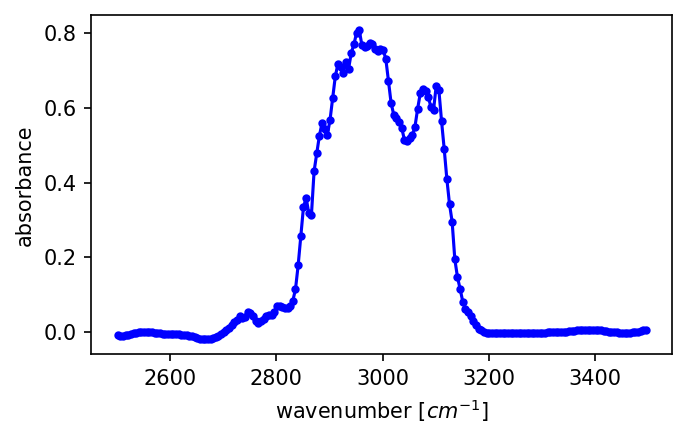

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('propene.csv')
print(df.columns)
x_all = df['wavenumber'].values
y_all = df['intensity [a.u.]'].values

idxs = np.logical_and(x_all > 2500, x_all < 3500)
x_peak = x_all[idxs]
y_peak = y_all[idxs] - 0.146 #baseline subtraction

fig, ax = plt.subplots(figsize = (5, 3), dpi = 150)
ax.plot(x_peak, y_peak, '-b', marker = '.')
ax.set_xlabel('wavenumber [$cm^{-1}$]')
ax.set_ylabel('absorbance');

In this problem, you will fit IR spectrum peaks with multiple Gaussians to find the optimal positions and widths of the peaks. For this task, you will assume that the spectra is given by a linear combination of Gaussians:

$$y = \sum^N_{i=0} w_i exp(-\frac{(x-\mu_i)^2}{2\sigma_i^2})$$

where $y$ is the spectra, $x$ is the wavenumber, $w_i$, $\mu_i$, and $\sigma_i$ are parameters that control the weight, position, and width of peak $i$.

## 1a: Gaussian peaks as linear "features"

**10 points:** Create a function called `gaussian_features` that takes the following arguments and returns a **matrix** where each row corresponds to a wavenumber in the original data and each column corresponds to a single peak evaluated at that wavenumber.

- input data `x` (wavenumbers in this case) (1-dimensional numpy array, assumed to be of length 3N)
- a parameter vector `lamda`: $\vec{\lambda} = [\vec{w}, \vec{\mu}, \vec{\sigma}]$ (1-dimensional numpy array)
- a number of Gaussians `N` (int)

**Hint:** This is similar to the `gaussian_features` function from the [linear regression lecture](https://github.com/medford-group/data_analytics_ChE/blob/master/1-numerical_methods/Topic3-Linear_Regression.ipynb), but allows for varying heights, positions, and widths similar to the loss functions defined in the [numerical optimization](https://github.com/medford-group/data_analytics_ChE/blob/master/1-numerical_methods/Topic4-Numerical_Optimization.ipynb) lecture.

**Note:** Using evenly-spaced Gaussians with a fixed width will get partial credit for this problem, and will allow you to complete the subsequent problems for (near) full credit.

In [33]:
def gaussian_features(x, lamda, N):
    x = x.reshape(-1) #ensure that x is a vector
    ########################################
    # Start your code here
    w_vec = lamda[:N]
    mu_vec = lamda[N:2*N]
    sig_vec = lamda[2*N:3*N]
    features = []
    for w, mu, sig in zip(w_vec, mu_vec, sig_vec):
        features.append(w*np.exp(-((x - mu)**2/(2*sig**2))))
    return np.array(features).T
    ########################################

In [34]:
lamda_test = np.array([1., 1., 1., 2750., 2950., 3100., 50., 75., 50.])
x_test = np.linspace(2500, 3500, 200)
X = gaussian_features(x_test, lamda_test, 3)
y = X.sum(1)
assert np.isclose(y.sum(),87.29332419269942) 

**10 points:** Your colleague tells you that there should be two C-H stretching peaks with the following position and width:

* $\mu_0 = 2950$, $\sigma_0 = 75$
* $\mu_1 = 3100$, $\sigma_1 = 25$

Utilize the `gaussian_features` function you created to perform **linear regression** to determine the optimal weights, $w_i$, assuming these peak positions and widths are correct. You do not need to add an intercept term. To receive full credit you should **only use matrix multiplication and a linear solver**, but you will receive partial credit if you use scikit-learn or other built-in regression packages (note that the autograder may not pass with other packages).

In [35]:
########################################
# Start your code here
lamda = [1., 1., 2950., 3100., 75., 25.]
X = gaussian_features(x_peak, lamda, 2)

A = X.T@X
b = X.T@y_peak
w_lsr = np.linalg.solve(A,b)
########################################

In [36]:
assert np.isclose(sum(w_lsr), 1.3699948626299556)

**5 points:** Plot the prediction with the optimized weights compared to the original data.

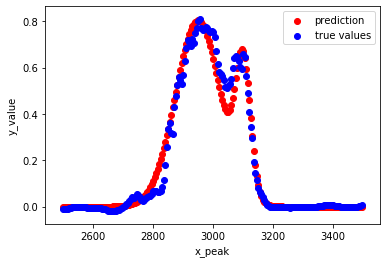

In [37]:
########################################
# Start your code here
yhat_linear = X@w_lsr

fig, ax = plt.subplots()
ax.scatter(x_peak, yhat_linear, color= "r", label = "prediction")
ax.scatter(x_peak, y_peak, color = "b", label = "true values")
plt.xlabel("x_peak")
plt.ylabel("y_value")
plt.legend()
########################################

## 1b: Non-linear regression of Gaussian peaks

In this problem you will use non-linear regression using the `scipy` `minimize` function to allow the positions and widths of the peaks to vary.

**5 points:** Import the `minimize` function from `scipy`.

In [38]:
########################################
# Start your code here
from scipy.optimize import minimize
########################################

In [39]:
assert minimize, "minimize not imported"

**5 points:** Create a "loss function" that takes the following arguments and returns the average of squared errors:

- input data `x` (wavenumbers in this case) (1-dimensional numpy array, assumed to be of length 3N)
- target data `y` (absorbance in this case) (1-dimensional numpy array)
- a parameter vector `lamda`: $\vec{\lambda} = [\vec{w}, \vec{\mu}, \vec{\sigma}]$ (1-dimensional numpy array)
- a number of Gaussians `N` (int)

You may assume that the length of `lamda` is 3 x `N`.

In [40]:
def loss(x, y, lamda, N):
########################################
# Start your code here
    X = x
    predict = np.zeros(X.shape[0])
    for i in range(N):
        predict += lamda[i] * np.exp(-(X - lamda[i+N])**2 / 2 / lamda[i+2*N]**2)
        
    return ((predict-y)**2).mean()
########################################

In [41]:
lamda_test = [1., 1., 2950., 3100., 75., 25.]
assert np.isclose(loss(x_peak, y_peak, lamda_test, 2), 0.017141358498574434)

**5 points:** As covered in the lecture notes, the `minimize` function requires a loss function of which only one argument is unknown. Write a function `g` that takes the same arguments as `loss` does, while `x`, `y`, and `N` are predefined and only `lamda` remains unknown. The returned value of `g` should be the same as that of `loss` function. The default values for `x`, `y`, and `N` are provided below. 

In [42]:
x = x_peak
y = y_peak

N = 2

In [43]:
def g(lamda, x=x_peak, y=y_peak, N=N):
########################################
# Start your code here
    return loss(x, y, lamda, N)
########################################

In [44]:
lamda_test = np.array([1., 1., 1., 2850, 2950., 3100.,30., 75., 25.])
assert np.isclose(g(lamda_test), 2.0629551012463683)

**5 points:** Minimize the `g` function with respect to `lamda` by using the scipy `minimize` function. You should use the `L-BFGS-B` algorithm for the optimization and use the defaults for all tolerances.  Save the optimized $\vec{\lambda}$ to a variable called `lamda_opt`.  The initial guess for `lamda` is given below.

In [45]:
init_lamda =  np.array([1., 1., 2950., 3100., 75., 25.])

In [46]:
########################################
# Start your code here
res = minimize(g, init_lamda, method = 'L-BFGS-B')
lamda_opt = res.x
########################################

In [47]:
assert np.isclose(np.linalg.norm(lamda_opt), 4283.4043840202885)

**5 points:** Plot the prediction with the optimized peaks compared to the original data.

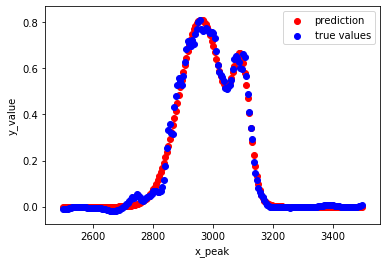

In [48]:
########################################
# Start your code here
X = gaussian_features(x, lamda_opt, 2)
yhat_nl = X.sum(1)

fig, ax = plt.subplots()
ax.scatter(x_peak, yhat_nl, color= "r", label = "prediction")
ax.scatter(x_peak, y_peak, color = "b", label = "true values")
plt.xlabel("x_peak")
plt.ylabel("y_value")

plt.legend()
########################################

### 1c: Complexity comparison

You tell your colleague that you found different peak positions and widths that fit the spectra better, and they argue that their positions and widths are correct because they are in a textbook, and that the ones you determined are less valid because "with enough parameters you can fit an elephant".

You recognize that over-fitting could be a problem in this case, and decide to compare the two results with the **Bayesan information criteria** (BIC) to determine if the additional fitted parameters are justified by the data. The BIC is computed as:

$\mathrm{BIC}=n\times ln\left(\sigma_e^2\right)+k\times ln\left(n\right)$

where $n$ is the number of data points, $\sigma_e$ is the standard deviation of the error, and $k$ is the number of parameters.

**5 points:** Create a function `BIC` that returns the BIC for a given true value `y` and predicted value `y_hat`. `BIC` takes three arguments:

- `y`: true value (1-D numpy array)
- `y_hat`: predicted value (1-D numpy array)
- `k`: the number of parameters (float)

In [49]:
def BIC(y, y_hat, k):
########################################
    # Start your code here
    err = y - y_hat
    sigma = np.std(np.real(err))
    n = len(y)
    bic = n*np.log(sigma**2) + k*np.log(n)
########################################
    return bic

In [50]:
assert np.isclose(BIC(x_peak, y_peak, 10), 2319.1075825285), "wrong BIC"

**5 points:** Use the BIC function to calculate the BIC for the two cases above:

* Linear fitting of the weights of each peak, with the position and width fixed
* Non-linear fitting of all parameters of the two peaks

Based on the results, which fit would you recommend as being more accurate? Justify your answer using the BIC.

In [53]:
########################################
# Start your code here
BIC_linear = BIC(y_peak, yhat_linear, 2)
BIC_nonlinear = BIC(y_peak, yhat_nl, 6)

print("BIC for linear and non linear fitting are {} and {}, respectively.".format(BIC_linear, BIC_nonlinear))
########################################

BIC for linear and non linear fitting are -1233.3444931460178 and -1451.1025800884875, respectively.


#### The BIC for the non-linear regression is lower despite the additional parameters. Therefore, this model is recommended. 

#### Full credit was awarded if (1) students correctly noted that the number of parameters increased for non-linear optimization and (2) students noted that lower BIC corresponds to a more probable model.

## Problem 2: High-dimensional regression (60 points)

### Loading data

**5 points:** In this problem, we will work with the Dow dataset. Import `pandas` and read in the `impurity_dataset-validation.xlsx` as a `pandas.DataFrame` with a variable name `df`. Note that the `impurity_dataset-validation.xlsx` is in the same folder as this jupyter notebook.

In [56]:
########################################
# Start your code here
import pandas as pd
df = pd.read_excel('impurity_dataset-validation.xlsx')
########################################

In [57]:
assert type(df) == pd.core.frame.DataFrame
assert df.shape == (5959, 46)
assert np.isclose(np.linalg.norm(df[df.columns[1:]].loc[2]), 3880.1035172616166)

The cell below will clean the `df` to remove invalid cells and missing values. This cell create two variables `X` and `y` that will be the input feature matrix and corresponding impurity concentrations, respectively. 

In [58]:
def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True

all_data = df[df.columns[1:]].values #drop the first column (date)
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis=1).copy().values #True if all values in a row are real numbers
X = np.array(all_data[real_rows,:-5], dtype='float') #drop the last 5 cols that are not inputs
y = np.array(all_data[real_rows,-3], dtype='float')
y = y.reshape(-1,1)

### 2.1: LASSO regression

In this problem, you will utilize LASSO regression to train a model that predicts the impurity concentration and interpret the results.

**10 points:** Train a LASSO model with the imported dataset and evalate its performance. More detailed instructions are below.

- Do a train/test split on `X` and `y` by `train_test_split` with `test_size=0.3` and `random_state=42`. The training set and test set should be named as `*_train` and `*_test` where `*` denotes either `X` or `y`, respectively.
- Declare a LASSO model with `alpha=1e-3` and `tol=0.1`. Assign the LASSO model to the variable `lasso`. 
- Assign the resulting  $\mathrm{r^2}$ to a variable `r2`. 

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

########################################
# Start your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lasso = Lasso(alpha = 1e-3, tol=0.1)

lasso.fit(X_train, y_train)
r2 = lasso.score(X_test, y_test)
########################################

In [60]:
assert np.isclose(r2, 0.3562523921897953)

**5 points:** Next, you decide to optimize the regularization strength. You also know that the number of total parameters in the model is an important consideration. For the following regularization strengths, `alpha_list`, below calculate:

* The $r^2$ score on the test set, stored as `r2_list`
* The number of non-zero parameters in the model, stored as `N_parameter_list`
* The optimal value of `alpha` stored as `alpha_opt`

Use `tol=0.1` for all values of `alpha`.

**Hint:** You may want to use the `count` method of lists. 

In [71]:
alpha_list = [1e-3, 1e-2, 1e-1, 0.5, 1, 10]

########################################
# Start your code here
r2_list = []
N_parameter_list = []
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha, tol=0.1)

    lasso.fit(X_train, y_train)
    r2 = lasso.score(X_test, y_test)
    coefs = lasso.coef_
    N = len(coefs) - list(coefs).count(0)
    r2_list.append(r2)
    N_parameter_list.append(N)
########################################

In [72]:
assert np.isclose(np.sum([a*b for a,b in zip(r2_list, N_parameter_list)]), 27.711765627621812)

**5 points:** Plot the $r^2$ score and the number of parameters as a function of $log_{10}(\alpha)$.

Text(0, 0.5, 'number of parameters')

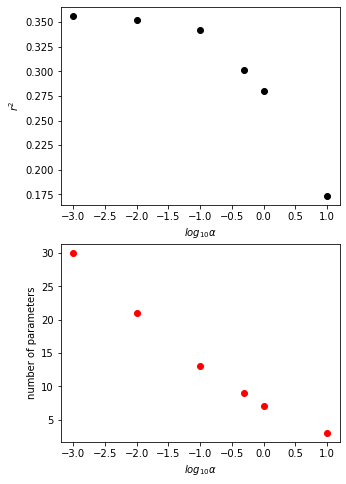

In [84]:
########################################
# Start your code here
fig, axes = plt.subplots(2,1, figsize=(5, 8))
axes[0].plot(np.log10(alpha_list), r2_list, 'ok')
axes[0].set_xlabel(r'$log_{10} \alpha $')
axes[0].set_ylabel(r'$r^2$')

axes[1].plot(np.log10(alpha_list), N_parameter_list, 'or')
axes[1].set_xlabel(r'$log_{10} \alpha $')
axes[1].set_ylabel(r'number of parameters')
########################################

### 2.2 PCA regression 

**5 points:** You are unsatisfied with the results of the LASSO model and decide to try principal component analysis (PCA) instead. Utilize any implementation of PCA you would like to project the **training data** onto two principal component vectors.

Save the projected data as `PCA_train_2d`. 

**Hint:** It is recommended that you save the full PCA projection as `PCA_train` for subsequent parts of the problem.

**Note:** The `scikit-learn` implementation of PCA is used for the auto-grader tests.

In [86]:
########################################
# Start your code here
from sklearn.decomposition import PCA

pca = PCA()
PCA_train = pca.fit_transform(X_train)
PCA_train_2d = PCA_train[:,:2]
########################################

In [87]:
assert PCA_train_2d.shape == (3967, 2)
assert np.isclose(np.linalg.norm(PCA_train_2d), 13713.628922882413)

**5 points:** Next, you realize that you also need to project the **testing data** onto the principal components. Save the resulting projection as `PCA_test_2d`.

In [88]:
########################################
# Start your code here
PCA_test = pca.transform(X_test)
PCA_test_2d = PCA_test[:, :2]
########################################

In [89]:
assert PCA_test_2d.shape == (1701, 2)
assert np.isclose(np.linalg.norm(PCA_test_2d), 8839.228124388832)

**5 points:** Create a scatter plot of the data projected onto the first two principal components. The x-axis should be labeled as '1st principal component' and the y-axis should be labeled as '2nd principal component', and each point on the scatter plot should correspond to a point in the train/test set. Use different colors for the train/test set points.

**Hint:** You may want to use `alpha=0.3` to make transparent points so that it is clearer when multiple points are on top of each other.

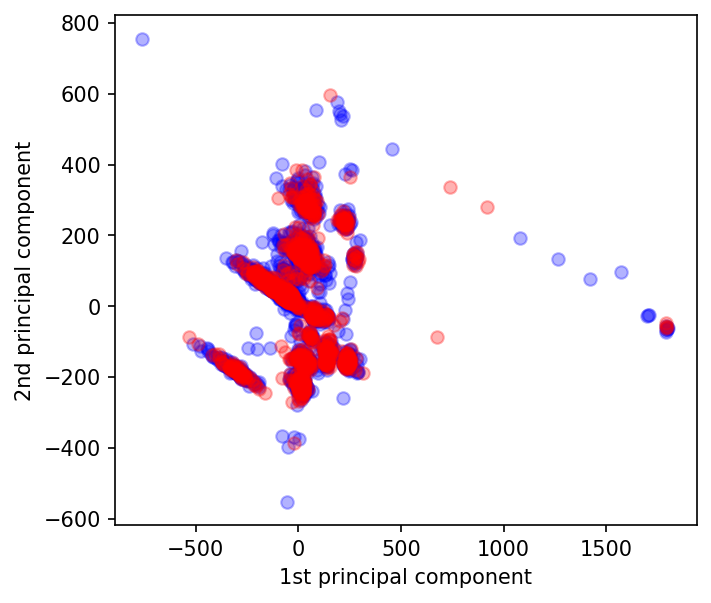

In [90]:
########################################
# Start your code here
fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
ax.scatter(PCA_train[:, 0], PCA_train[:, 1], c='b', alpha = .3)
ax.scatter(PCA_test[:, 0], PCA_test[:, 1], c='r', alpha = .3)
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component');
########################################

**5 points:** Next, you will train a linear regression model to predict the y data with each individual principal component and see how the model performance changes for each of the principal components, where you will evaluate the performance using the $r^2$ score on the **test set**. You should use an intercept term in the linear regression, and may use any strategy you like to perform the linear regression (the auto-grader value is determined with the `scikit-learn` implementation).

* Save the resulting list of $r^2$ values corresponding to each principal component as `r2_PC_list`.
* Create a plot of $r^2$  vs. principal component vector number. 

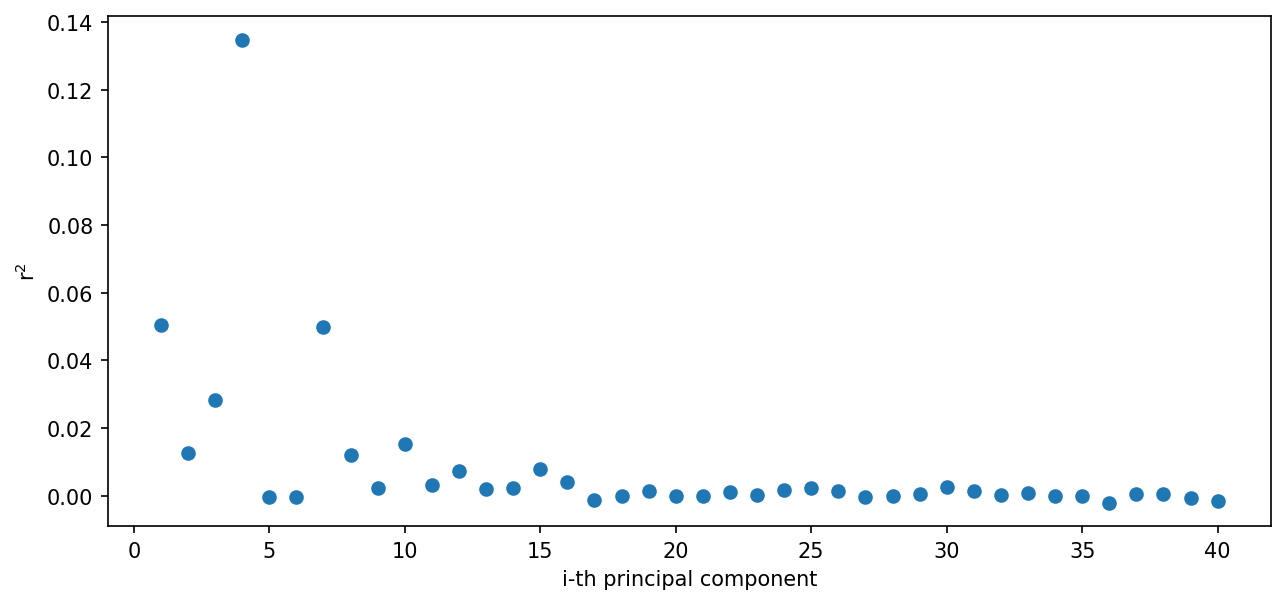

In [94]:
from sklearn.linear_model import LinearRegression

r2_PC_list = []

for i in range(PCA_train.shape[1]):
    lr = LinearRegression(fit_intercept = True)
    lr.fit(PCA_train[:, i].reshape(-1, 1), y_train)
    r2_PC_list.append(lr.score(PCA_test[:, i].reshape(-1, 1), y_test))
    
fig, ax = plt.subplots(figsize = (10, 4.5), dpi = 150)
ax.plot(range(1, 41), r2_PC_list, 'o')
ax.set_xlabel('i-th principal component')
ax.set_ylabel('$\mathrm{r^2}$');

In [95]:
assert np.isclose(sum(r2_PC_list), 0.3382811635117108)

**5 points:** Finally, you decide to create a new linear regression model that utilizes the **first 15 principal components**. Evaluate the resulting $r^2$ score and save it as `r2_15PCs`.

In [96]:
########################################
# Start your code here
lr = LinearRegression(fit_intercept = True)

some_PCs_train = PCA_train[:, :15]

lr.fit(some_PCs_train, y_train)

some_PCs_test = PCA_test[:, :15]

r2_15PCs = lr.score(some_PCs_test, y_test)
########################################

In [97]:
assert np.isclose(r2_15PCs, 0.34346202341681553) 

**10 points:** Your supervisor asks you to identify the best model that depends on 15 or fewer process parameters. Based on the analysis in **both 2.1 and 2.2** which model would you recommend? Justify your choice in terms of the accuracy and the number of process parameters needed to make predictions.

**Hint:** You should be able to answer this question even if you were not able to solve any of the problems above.

#### The LASSO model is the only viable option since there is a requirement that the model only depends on 15 process parameters. PCA utilizes all "process parameters" (e.g. original columns of the data table) even though it projects onto a fewer number of dimensions. It is not possible to find the PCA projection of a new data point without knowledge of all of the original "process parameter" features. Put differently, PCA is a feature engineering and dimensional reduction tool, but it is does not select features from the original dataset.

#### It is also worth noting that the r^2 values for the LASSO model with 15 input features was very similar to the result with 15 PC's, so the argument of significantly higher accuracy does not hold here.

## Problem 3: Classification

In this problem, you will work with a subset of the perovskite dataset, where we will only consider the radius of A, B, and X ions as possible features. The codeblock below reads the data in and stores it to the `X_perov` and `y_perov` matrices.

In [98]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('perovskite_data.csv')

X_perov = df[['rA (Ang)', 'rB (Ang)', 'rX (Ang)']].values
y_perov = df['exp_label'].values

**15 points:** Using a classification algorithm of your choice, construct and optimize a classification model. The following are the requirements for full credit:

* You should use the *validation* set defined below to evaluate the accuracy.
* You should only use the features defined above.
* You should optimize at least one hyperparameter by checking at least 5 different values and print the optimal hyperparameter(s) that results in the highest accuracy score on the *validation set*.
* You should show that the optimal model achieves accuracy, precision, and recall of $>$90% (each one should be $>$90%) on the *validation* set.
* You should plot the confusion matrix for the *validation set*.

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_perov, y_perov, test_size = .5, random_state = 1017)

**One possible solution:**

In [109]:
########################################
# Start your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

depths = range(2, 20)

opt_acc = 0
for depth in depths:
    dtree = DecisionTreeClassifier(max_depth = depth)
    dtree.fit(X_train, y_train)

    if opt_acc < dtree.score(X_val, y_val):
        opt_depth = depth
        opt_acc = dtree.score(X_val, y_val)
        
dtree = DecisionTreeClassifier(max_depth = opt_depth)
dtree.fit(X_train, y_train)

acc = accuracy_score(y_val, dtree.predict(X_val))
prec = precision_score(y_val, dtree.predict(X_val))
rec = recall_score(y_val, dtree.predict(X_val))

print(acc, prec, rec)
########################################

0.9097222222222222 0.93125 0.9085365853658537


(0, 2)

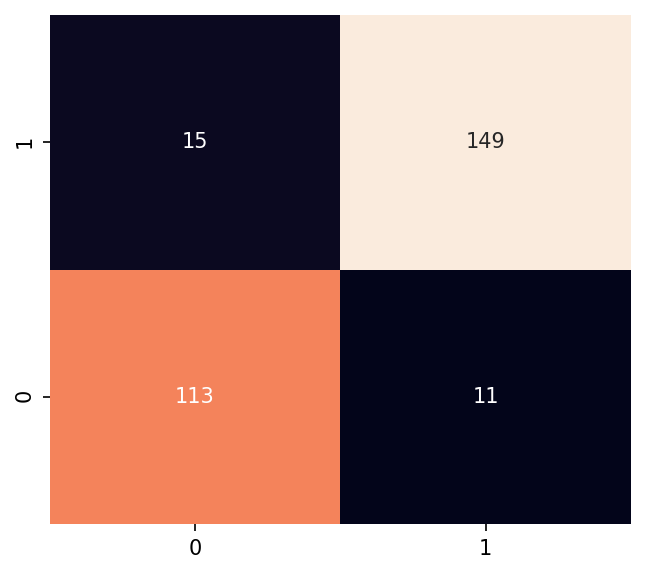

In [110]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, dtree.predict(X_val))

import seaborn as sns

fig, ax = plt.subplots(figsize = (5, 4.5), dpi = 150)
sns.heatmap(cm, ax = ax, annot = True, fmt = "d", cbar = False)
ax.set_ylim([0,2])